In [45]:
using Plots
using LinearAlgebra
using HDF5
using LaTeXStrings

In [46]:
include("../src/Heisenberg_cat.jl")

main (generic function with 1 method)

In [50]:
W = 1.0
A = 0.02
α = sqrt(2.0)
ωc = 1.0
dt = 0.01
Nt = 1000
N = 100
main(W, A, α, ωc, dt, Nt, N)

In [53]:
f = h5open("../data/Heisenberg_cat.h5", "r")
σ⁺_pp = read(f,"σ⁺_pp")
σᶻ_pp = read(f,"σᶻ_pp")
σ⁺_mm = read(f,"σ⁺_mm")
σᶻ_mm = read(f,"σᶻ_mm")
σ⁺_mp = read(f,"σ⁺_mp")
σᶻ_mp = read(f,"σᶻ_mp")
σ⁻_mp = read(f,"σ⁻_mp")
ts = read(f,"ts")
n1 = read(f,"n1")
n2 = read(f,"n2")
b1 = read(f,"b1")
b2 = read(f,"b2")
close(f)

# define the physical quantities
J_pp = zeros(ComplexF64, 2, Nt)
J_mm = zeros(ComplexF64, 2, Nt)
J_mp = zeros(ComplexF64, 2, Nt)
J_pm = zeros(ComplexF64, 2, Nt)
# calculation of physical quantities
for i in eachindex(n1)
    for j in eachindex(n2)
        k = b1 * n1[i] + b2 * n2[j]
        dif = diff_h(W, k)
        J_pp[1,:] += dif[1] * σ⁺_pp[i,j,:]  + conj.(dif[1] * σ⁺_pp[i,j,:])
        J_pp[2,:] += dif[2] * σ⁺_pp[i,j,:]  + conj.(dif[2] * σ⁺_pp[i,j,:])
        J_mm[1,:] += dif[1] * σ⁺_mm[i,j,:]  + conj.(dif[1] * σ⁺_mm[i,j,:])
        J_mm[2,:] += dif[2] * σ⁺_mm[i,j,:]  + conj.(dif[2] * σ⁺_mm[i,j,:])
        J_mp[1,:] += dif[1] * σ⁺_mp[i,j,:]  + conj(dif[1]) * σ⁻_mp[i,j,:]
        J_mp[2,:] += dif[2] * σ⁺_mp[i,j,:]  + conj(dif[2]) * σ⁻_mp[i,j,:]
        J_pm[1,:] += dif[1] * conj(σ⁻_mp[i,j,:])  + conj(dif[1]) * conj(σ⁺_mp[i,j,:])
        J_pm[2,:] += dif[2] * conj(σ⁻_mp[i,j,:])  + conj(dif[2]) * conj(σ⁺_mp[i,j,:])
    end
end
J_pp /= N^2
J_mm /= N^2
J_mp /= N^2
J_pm /= N^2

2×1000 Matrix{ComplexF64}:
 -2.52402e-19+0.0im  -4.20107e-19-5.8386e-10im   …  -4.17374e-19+4.85808e-5im
  1.56992e-20+0.0im   4.25007e-21-1.74393e-15im     -4.61436e-20-2.83277e-8im

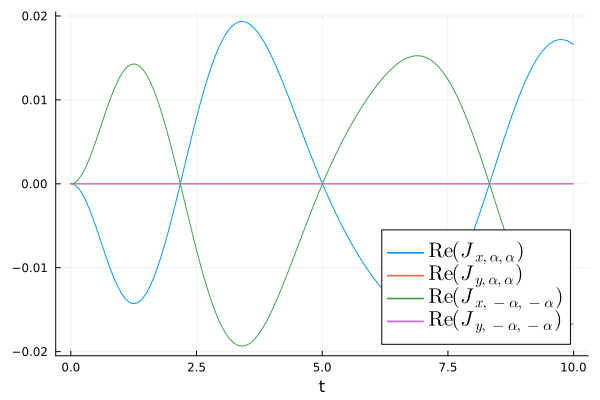

In [64]:
plot(ts, real(J_pp[1,:]), label=L"\mathrm{Re}(J_{x,\alpha,\alpha})", xlabel="t")
plot!(ts, real(J_pp[2,:]), label=L"\mathrm{Re}(J_{y,\alpha,\alpha})", xlabel="t")
plot!(ts, real(J_mm[1,:]), label=L"\mathrm{Re}(J_{x,-\alpha,-\alpha})", xlabel="t")
plot!(ts, real(J_mm[2,:]), label=L"\mathrm{Re}(J_{y,-\alpha,-\alpha})", xlabel="t", legend=:bottomright, legendfontsize=14)

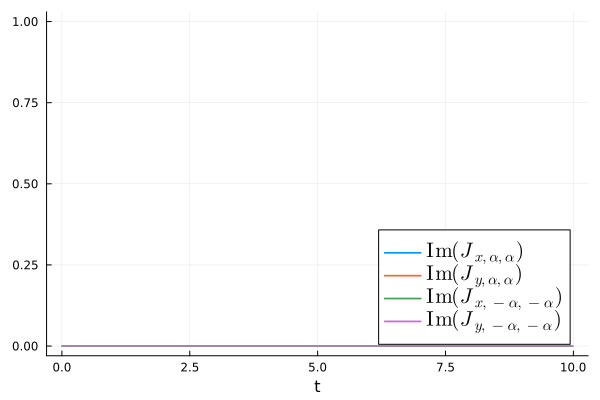

In [65]:
plot(ts, imag(J_pp[1,:]), label=L"\mathrm{Im}(J_{x,\alpha,\alpha})", xlabel="t")
plot!(ts, imag(J_pp[2,:]), label=L"\mathrm{Im}(J_{y,\alpha,\alpha})", xlabel="t")
plot!(ts, imag(J_mm[1,:]), label=L"\mathrm{Im}(J_{x,-\alpha,-\alpha})", xlabel="t")
plot!(ts, imag(J_mm[2,:]), label=L"\mathrm{Im}(J_{y,-\alpha,-\alpha})", xlabel="t", legend=:bottomright, legendfontsize=14)

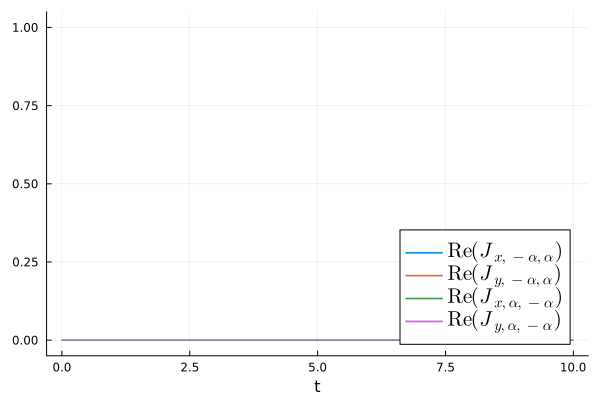

In [68]:
plot(ts, real(J_mp[1,:]), label=L"\mathrm{Re}(J_{x,-\alpha,\alpha})", xlabel="t")
plot!(ts, real(J_mp[2,:]), label=L"\mathrm{Re}(J_{y,-\alpha,\alpha})", xlabel="t")
plot!(ts, real(J_pm[1,:]), label=L"\mathrm{Re}(J_{x,\alpha,-\alpha})", xlabel="t")
plot!(ts, real(J_pm[2,:]), label=L"\mathrm{Re}(J_{y,\alpha,-\alpha})", xlabel="t", legend=:bottomright, legendfontsize=14,ylims=(-0.05,1.05))

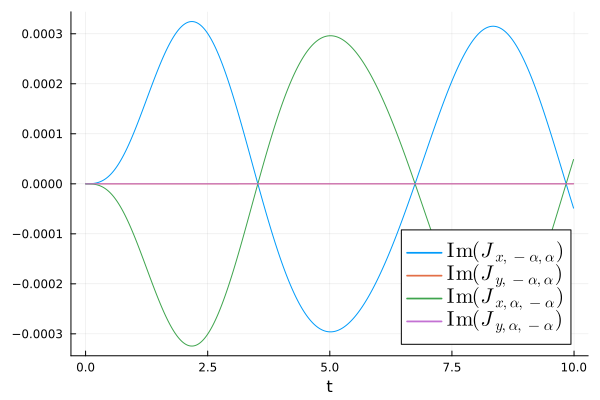

In [69]:
plot(ts, imag(J_mp[1,:]), label=L"\mathrm{Im}(J_{x,-\alpha,\alpha})", xlabel="t")
plot!(ts, imag(J_mp[2,:]), label=L"\mathrm{Im}(J_{y,-\alpha,\alpha})", xlabel="t")
plot!(ts, imag(J_pm[1,:]), label=L"\mathrm{Im}(J_{x,\alpha,-\alpha})", xlabel="t")
plot!(ts, imag(J_pm[2,:]), label=L"\mathrm{Im}(J_{y,\alpha,-\alpha})", xlabel="t", legend=:bottomright, legendfontsize=14)

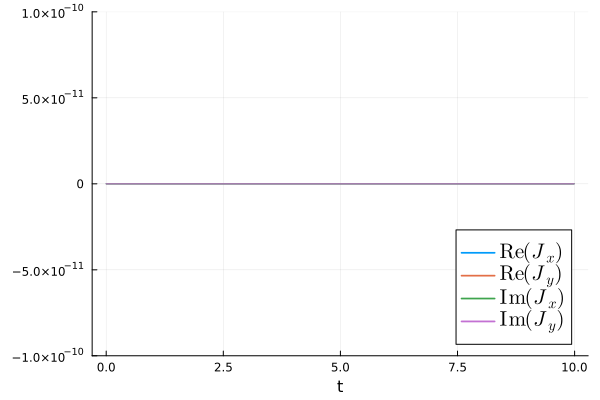

In [76]:
plot(ts, real(J_pp[1,:] + J_mm[1,:] + J_mp[1,:] + J_pm[1,:]), label=L"\mathrm{Re}(J_x)", xlabel="t")
plot!(ts, real(J_pp[2,:] + J_mm[2,:] + J_mp[2,:] + J_pm[2,:]), label=L"\mathrm{Re}(J_y)", xlabel="t")
plot!(ts, imag(J_pp[1,:] + J_mm[1,:] + J_mp[1,:] + J_pm[1,:]), label=L"\mathrm{Im}(J_x)", xlabel="t")
plot!(ts, imag(J_pp[2,:] + J_mm[2,:] + J_mp[2,:] + J_pm[2,:]), label=L"\mathrm{Im}(J_y)", xlabel="t", legend=:bottomright, legendfontsize=14,ylims=(-1e-10,1e-10))